# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Read the datasets

In [4]:
# columns
attack_columns = ['Attack ID', 'Card', 'Victim IP', 'Port number', 'Attack code', 'Detect count', 'Significant flag',
                   'Packet speed', 'Data speed', 'Avg packet len', 'Avg source IP count', 'Start time', 'End time', 'Whitelist flag', 'Type']
vector_columns = ['Attack ID', 'Detect count', 'Card', 'Victim IP', 'Port number', 'Attack code', 'Significant flag', 
                  'Packet speed', 'Data speed', 'Avg packet len', 'Source IP count', 'Time']

numerical_cols = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count', 'time_of_day'] # 'victim IP num', 'Port number'

In [5]:
# path to the train files
attacks_path = '../data/raw/attacks.anon.train.csv'
vectors_path = '../data/raw/vectors.anon.train.csv'

val_attacks_path = '../data/raw/attacks.anon.validation.csv'
val_vectors_path = '../data/raw/vectors.anon.validation.csv'

In [6]:
# read the datasets
attack_df = pd.read_csv(attacks_path)
vector_df = pd.read_csv(vectors_path)

val_attack_df = pd.read_csv(val_attacks_path, names= attack_columns)
val_vector_df = pd.read_csv(val_vectors_path, names = vector_columns)

In [7]:
attack_df.head()

,Attack ID,Card,Victim IP,Port number,Attack code,Detect count,Significant flag,Packet speed,Data speed,Avg packet len,Avg source IP count,Start time,End time,Whitelist flag,Type
0,1,sga10gq0,IP_0001,4500,High volume traffic,1,0,55600,73,1383,6,2022-08-08T18:09:36,2022-08-08T18:09:37,0,Normal traffic
1,2,sga10gq0,IP_0002,4500,High volume traffic,1,0,63500,90,1506,1,2022-08-08T18:37:28,2022-08-08T18:37:28,0,Normal traffic
2,3,sga10gq0,IP_0003,1200,High volume traffic,2,0,62700,82,1399,1,2022-08-08T18:41:25,2022-08-08T18:41:26,0,Normal traffic
3,4,sga10gq0,IP_0002,4500,High volume traffic,1,0,59500,85,1486,1,2022-08-08T18:47:49,2022-08-08T18:47:50,0,Normal traffic
4,5,sga10gq0,IP_0004,12347,High volume traffic,2,1,78250,113,1518,1,2022-08-08T18:57:15,2022-08-08T18:58:11,0,Normal traffic


In [8]:
vector_df.head()

,Attack ID,Detect count,Card,Victim IP,Port number,Attack code,Significant flag,Packet speed,Data speed,Avg packet len,Source IP count,Time
0,1,1,sga10gq0,IP_0001,4500,High volume traffic,0,55600,73,1383,6,2022-08-08T18:09:36
1,2,1,sga10gq0,IP_0002,4500,High volume traffic,0,63500,90,1506,1,2022-08-08T18:37:28
2,3,1,sga10gq0,IP_0003,1200,High volume traffic,0,59700,79,1399,1,2022-08-08T18:41:25
3,3,2,sga10gq0,IP_0003,1200,High volume traffic,0,65700,86,1399,1,2022-08-08T18:41:26
4,4,1,sga10gq0,IP_0002,4500,High volume traffic,0,59500,85,1486,1,2022-08-08T18:47:49


In [9]:
val_attack_df.head()

,Attack ID,Card,Victim IP,Port number,Attack code,Detect count,Significant flag,Packet speed,Data speed,Avg packet len,Avg source IP count,Start time,End time,Whitelist flag,Type
0,702942,sga10gq0,IP_60532,0,High volume traffic,3,0,52200,75,1501,1,2023-08-25T18:05:56,2023-08-25T18:08:25,0,Normal traffic
1,702943,sga10gq0,IP_67501,0,High volume traffic,1,0,68000,91,1404,1,2023-08-25T18:06:31,2023-08-25T18:06:32,0,Normal traffic
2,702944,sga10gq0,IP_60976,0,High volume traffic,2,0,69900,86,1284,1,2023-08-25T18:06:43,2023-08-25T18:06:44,0,Normal traffic
3,702945,sga10gq0,IP_67222,0,High volume traffic,2,0,64650,85,1386,1,2023-08-25T18:10:21,2023-08-25T18:12:14,0,Normal traffic
4,702946,sga10gq0,IP_1386,0,High volume traffic,2,0,63500,34,585,1,2023-08-25T18:10:58,2023-08-25T18:11:27,0,Normal traffic


In [10]:
val_vector_df.head()

,Attack ID,Detect count,Card,Victim IP,Port number,Attack code,Significant flag,Packet speed,Data speed,Avg packet len,Source IP count,Time
0,702942,1,sga10gq0,IP_60532,0,High volume traffic,0,51800,74,1506,1,2023-08-25T18:05:56
1,702943,1,sga10gq0,IP_67501,0,High volume traffic,0,68000,91,1404,1,2023-08-25T18:06:31
2,702942,2,sga10gq0,IP_60532,0,High volume traffic,0,53700,76,1494,1,2023-08-25T18:06:40
3,702944,1,sga10gq0,IP_60976,0,High volume traffic,0,81600,100,1287,1,2023-08-25T18:06:43
4,702944,2,sga10gq0,IP_60976,64755,High volume traffic,0,58200,71,1281,1,2023-08-25T18:06:43


# Preprocess the data

In [11]:
def merge_df(attack_df, vector_df):
    merged_df = pd.merge(vector_df, attack_df[['Attack ID','Start time', 'End time', 'Type']], on='Attack ID', how='left')
    return merged_df

In [12]:
def get_attack_duration(df):
    # convert date columns
    df['Start time'] = pd.to_datetime(df['Start time'].replace('0', np.nan), errors = 'coerce')
    df['End time'] = pd.to_datetime(df['End time'].replace('0', np.nan), errors = 'coerce')

    # drop NaN values
    df = df.dropna(subset=['Start time', 'End time'])

    # get duration
    df['Attack duration'] = df['End time'] - df['Start time']
    df['Attack duration'] = df['Attack duration'].apply(lambda x: x.total_seconds())

    #drop the start and end column
    df = df.drop(columns=['Start time', 'End time'], errors='ignore')

    return df.copy()

In [13]:
def encode_attack_labels(df):
    # convert string to list
    df['attack code list'] = df['Attack code'].apply(lambda x: x.replace(', ',',').split(','))
    # Identify unique labels
    unique_labels = set(label for sublist in df['attack code list'] for label in sublist)

    # create empty one-hot encoded columns
    for label in unique_labels:
        df[label] = 0

    # iterate through rows and update one-hot encoded columns
    for idx, row in df.iterrows():
        labels = row['attack code list']
        for label in labels:
            df.at[idx, label] = 1

    # drop the original 'attack code list' column
    df.drop('attack code list', axis=1, inplace=True)

    return df.copy()

In [14]:
def convert_victim_ip(df):
    # ip address
    df['victim IP num'] = df['Victim IP'].apply(lambda x: int(x.split('_')[1]))
    return df.copy()

In [15]:
def convert_time(df):
    # time column -> is_weekday, time_of_day
    # convert date string to datetime
    df.rename(columns = {'Time':'time string'}, inplace = True)

    # was the time on the weekend
    df['time'] = pd.to_datetime(df['time string'])
    df['is_weekday'] = df['time'].apply(lambda x: int(x.weekday() < 5))
    df['is_weekday']

    # time of day in seconds
    df['time_of_day'] = df['time'].dt.time
    df['time_of_day'] = df['time_of_day'].apply(lambda x: 60*60*x.hour + 60*x.minute + x.second)

    return df.copy() 

In [16]:
def preprocces_for_aug(df):
    # attack duration
    df = get_attack_duration(df)
    # attack labels
    df = encode_attack_labels(df)
    # victim ip to num
    df = convert_victim_ip(df)
    # time col -> is_weekday, time_of_day
    df = convert_time(df)
    return df

In [17]:
# merge the attack and the vector dfs
train_df = merge_df(attack_df, vector_df)
val_df = merge_df(val_attack_df, val_vector_df)

# merge the train and validation datasets
merged_df = pd.concat([train_df, val_df], ignore_index=True)
print(train_df.shape, val_df.shape, merged_df.shape)
merged_df.head()


(586642, 15) (1247266, 15) (1833908, 15)


,Attack ID,Detect count,Card,Victim IP,Port number,Attack code,Significant flag,Packet speed,Data speed,Avg packet len,Source IP count,Time,Start time,End time,Type
0,1,1,sga10gq0,IP_0001,4500,High volume traffic,0,55600,73,1383,6,2022-08-08T18:09:36,2022-08-08T18:09:36,2022-08-08T18:09:37,Normal traffic
1,2,1,sga10gq0,IP_0002,4500,High volume traffic,0,63500,90,1506,1,2022-08-08T18:37:28,2022-08-08T18:37:28,2022-08-08T18:37:28,Normal traffic
2,3,1,sga10gq0,IP_0003,1200,High volume traffic,0,59700,79,1399,1,2022-08-08T18:41:25,2022-08-08T18:41:25,2022-08-08T18:41:26,Normal traffic
3,3,2,sga10gq0,IP_0003,1200,High volume traffic,0,65700,86,1399,1,2022-08-08T18:41:26,2022-08-08T18:41:25,2022-08-08T18:41:26,Normal traffic
4,4,1,sga10gq0,IP_0002,4500,High volume traffic,0,59500,85,1486,1,2022-08-08T18:47:49,2022-08-08T18:47:49,2022-08-08T18:47:50,Normal traffic


In [18]:
# column types
merged_df.dtypes

Attack ID            int64
Detect count         int64
Card                object
Victim IP           object
Port number          int64
Attack code         object
Significant flag     int64
Packet speed         int64
Data speed           int64
Avg packet len       int64
Source IP count      int64
Time                object
Start time          object
End time            object
Type                object
dtype: object

In [19]:
# preproccess the df
merged_df = preprocces_for_aug(merged_df)

<ipython-input-12-e71c63a76a34>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack duration'] = df['End time'] - df['Start time']
<ipython-input-12-e71c63a76a34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack duration'] = df['Attack duration'].apply(lambda x: x.total_seconds())


In [20]:
merged_df.dtypes

Attack ID                       int64
Detect count                    int64
Card                           object
Victim IP                      object
Port number                     int64
Attack code                    object
Significant flag                int64
Packet speed                    int64
Data speed                      int64
Avg packet len                  int64
Source IP count                 int64
time string                    object
Type                           object
Attack duration               float64
NTP                             int64
RPC                             int64
DNS                             int64
RIP                             int64
IPv4 fragmentation              int64
ACK Attack                      int64
RDP                             int64
Memcached                       int64
SNMP                            int64
CLDAP                           int64
Generic UDP                     int64
TFTP                            int64
ICMP        

In [21]:
# drop columns
cols_to_drop = ['Card', 'Attack ID', 'Detect count', 'Victim IP', 'Attack code', 'time string', 'time']

merged_df = merged_df.drop(cols_to_drop, axis=1, errors='ignore')

print(len(merged_df.columns))
merged_df.dtypes

33


Port number              int64
Significant flag         int64
Packet speed             int64
Data speed               int64
Avg packet len           int64
Source IP count          int64
Type                    object
Attack duration        float64
NTP                      int64
RPC                      int64
DNS                      int64
RIP                      int64
IPv4 fragmentation       int64
ACK Attack               int64
RDP                      int64
Memcached                int64
SNMP                     int64
CLDAP                    int64
Generic UDP              int64
TFTP                     int64
ICMP                     int64
Suspicious traffic       int64
SSDP                     int64
SYN Attack               int64
WSD                      int64
TCP Anomaly              int64
CHARGEN                  int64
High volume traffic      int64
Sentinel                 int64
CoAP                     int64
victim IP num            int64
is_weekday               int64
time_of_

# Augmemtation

We are using the SMOTE algorithm

In [27]:
# Define numerical and target columns
numerical_cols = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count', 'time_of_day', 'Attack duration']
target_col = 'Type'
non_numeric_cols = []
for col in merged_df.columns:
    if col not in numerical_cols:
        non_numeric_cols.append(col)
non_numeric_cols

['Port number',
 'Significant flag',
 'Type',
 'NTP',
 'RPC',
 'DNS',
 'RIP',
 'IPv4 fragmentation',
 'ACK Attack',
 'RDP',
 'Memcached',
 'SNMP',
 'CLDAP',
 'Generic UDP',
 'TFTP',
 'ICMP',
 'Suspicious traffic',
 'SSDP',
 'SYN Attack',
 'WSD',
 'TCP Anomaly',
 'CHARGEN',
 'High volume traffic',
 'Sentinel',
 'CoAP',
 'victim IP num',
 'is_weekday']

In [29]:
# Define preprocessing steps for numerical columns
numerical_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols)
], remainder='passthrough')

In [35]:
# fit the scaler
df_scaled = preprocessor.fit_transform(merged_df)

# Convert the result back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = numerical_cols + non_numeric_cols)
df_scaled.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Port number,Significant flag,Type,NTP,...,SSDP,SYN Attack,WSD,TCP Anomaly,CHARGEN,High volume traffic,Sentinel,CoAP,victim IP num,is_weekday
0,-0.219791,-0.165377,0.513485,-0.079065,0.729704,-0.404966,4500,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,1,1
1,-0.173919,-0.060541,0.772795,-0.089272,0.798683,-0.405081,4500,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,2,1
2,-0.195984,-0.128376,0.547216,-0.089272,0.80846,-0.404966,1200,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,3,1
3,-0.161145,-0.085208,0.547216,-0.089272,0.808501,-0.404966,1200,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,3,1
4,-0.197146,-0.091375,0.730631,-0.089272,0.824302,-0.404966,4500,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,2,1


In [36]:
# Encoding categorical features
label_encoders = {}
for column in ['Port number','victim IP num']:
    le = LabelEncoder()
    df_scaled[column] = le.fit_transform(df_scaled[column])
    label_encoders[column] = le

In [37]:
df_scaled.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Port number,Significant flag,Type,NTP,...,SSDP,SYN Attack,WSD,TCP Anomaly,CHARGEN,High volume traffic,Sentinel,CoAP,victim IP num,is_weekday
0,-0.219791,-0.165377,0.513485,-0.079065,0.729704,-0.404966,1337,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.173919,-0.060541,0.772795,-0.089272,0.798683,-0.405081,1337,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,1,1
2,-0.195984,-0.128376,0.547216,-0.089272,0.80846,-0.404966,173,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,2,1
3,-0.161145,-0.085208,0.547216,-0.089272,0.808501,-0.404966,173,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,2,1
4,-0.197146,-0.091375,0.730631,-0.089272,0.824302,-0.404966,1337,0,Normal traffic,0,...,0,0,0,0,0,1,0,0,1,1


In [38]:
# drop the target column
df_scaled = df_scaled.drop('Type', axis=1)
df_scaled.columns

Index(['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count',
       'time_of_day', 'Attack duration', 'Port number', 'Significant flag',
       'NTP', 'RPC', 'DNS', 'RIP', 'IPv4 fragmentation', 'ACK Attack', 'RDP',
       'Memcached', 'SNMP', 'CLDAP', 'Generic UDP', 'TFTP', 'ICMP',
       'Suspicious traffic', 'SSDP', 'SYN Attack', 'WSD', 'TCP Anomaly',
       'CHARGEN', 'High volume traffic', 'Sentinel', 'CoAP', 'victim IP num',
       'is_weekday'],
      dtype='object')

In [39]:
df_scaled.dtypes

Packet speed           object
Data speed             object
Avg packet len         object
Source IP count        object
time_of_day            object
Attack duration        object
Port number             int32
Significant flag       object
NTP                    object
RPC                    object
DNS                    object
RIP                    object
IPv4 fragmentation     object
ACK Attack             object
RDP                    object
Memcached              object
SNMP                   object
CLDAP                  object
Generic UDP            object
TFTP                   object
ICMP                   object
Suspicious traffic     object
SSDP                   object
SYN Attack             object
WSD                    object
TCP Anomaly            object
CHARGEN                object
High volume traffic    object
Sentinel               object
CoAP                   object
victim IP num           int32
is_weekday             object
dtype: object

In [40]:
for col in numerical_cols:
    df_scaled[col] = df_scaled[col].astype("float64")

for col in non_numeric_cols:
    if col != 'Type':
        df_scaled[col] = df_scaled[col].astype("int32")

In [41]:
categorical_cols = [col for col in non_numeric_cols if col != target_col]
categorical_cols

['Port number',
 'Significant flag',
 'NTP',
 'RPC',
 'DNS',
 'RIP',
 'IPv4 fragmentation',
 'ACK Attack',
 'RDP',
 'Memcached',
 'SNMP',
 'CLDAP',
 'Generic UDP',
 'TFTP',
 'ICMP',
 'Suspicious traffic',
 'SSDP',
 'SYN Attack',
 'WSD',
 'TCP Anomaly',
 'CHARGEN',
 'High volume traffic',
 'Sentinel',
 'CoAP',
 'victim IP num',
 'is_weekday']

In [42]:
df_scaled.dtypes

Packet speed           float64
Data speed             float64
Avg packet len         float64
Source IP count        float64
time_of_day            float64
Attack duration        float64
Port number              int32
Significant flag         int32
NTP                      int32
RPC                      int32
DNS                      int32
RIP                      int32
IPv4 fragmentation       int32
ACK Attack               int32
RDP                      int32
Memcached                int32
SNMP                     int32
CLDAP                    int32
Generic UDP              int32
TFTP                     int32
ICMP                     int32
Suspicious traffic       int32
SSDP                     int32
SYN Attack               int32
WSD                      int32
TCP Anomaly              int32
CHARGEN                  int32
High volume traffic      int32
Sentinel                 int32
CoAP                     int32
victim IP num            int32
is_weekday               int32
dtype: o

In [43]:
df_scaled.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Port number,Significant flag,NTP,RPC,...,SSDP,SYN Attack,WSD,TCP Anomaly,CHARGEN,High volume traffic,Sentinel,CoAP,victim IP num,is_weekday
0,-0.219791,-0.165377,0.513485,-0.079065,0.729704,-0.404966,1337,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.173919,-0.060541,0.772795,-0.089272,0.798683,-0.405081,1337,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,-0.195984,-0.128376,0.547216,-0.089272,0.808460,-0.404966,173,0,0,0,...,0,0,0,0,0,1,0,0,2,1
3,-0.161145,-0.085208,0.547216,-0.089272,0.808501,-0.404966,173,0,0,0,...,0,0,0,0,0,1,0,0,2,1
4,-0.197146,-0.091375,0.730631,-0.089272,0.824302,-0.404966,1337,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [50]:
print(len(df_scaled.columns))
print(len(categorical_cols))
print(len(numerical_cols))

32
26
6


In [52]:
categoric_mask = []
for col in df_scaled.columns:
    categoric_mask.append(col in categorical_cols)

In [53]:
# Apply SMOTE to the combined features and target
normal_count = np.round(merged_df[merged_df['Type'] == "Normal traffic"].shape[0],-3) + 1000
strategy = { "Normal traffic": normal_count, "DDoS attack": 0.4 * normal_count, "Suspicious traffic": 0.4 * normal_count}
smote = SMOTENC(sampling_strategy= strategy, categorical_features=categoric_mask, random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_scaled, merged_df[target_col])

c:\Users\Maya\.conda\envs\ddos\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (1369000) in class Normal traffic will be larger than the number of samples in the majority class (class #Normal traffic -> 1368133)
  warnings.warn(


# Transform augmented data

In [ ]:
# Reshape the synthetic samples back into the original shape of the array column
synthetic_df = pd.DataFrame(X_resampled, columns=df_scaled.columns)
synthetic_df[target_col] = y_resampled
synthetic_df.head()

,Port number,Packet speed,Data speed,Avg packet len,Source IP count,victim IP num,time_of_day,Significant flag,CLDAP,Generic UDP,...,High volume traffic,Sentinel,IPv4 fragmentation,Suspicious traffic,SSDP,TCP Anomaly,SNMP,DNS,is_weekday,Type
0,-0.797923,-0.277770,-0.170063,0.718870,-0.119381,-0.586344,0.585269,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
1,-0.797923,-0.183982,0.032760,0.935490,-0.138697,-0.586157,0.655756,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
2,-0.925953,-0.229095,-0.098479,0.747049,-0.138697,-0.585970,0.665747,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
3,-0.925953,-0.157864,-0.014963,0.747049,-0.138697,-0.585970,0.665789,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
4,-0.797923,-0.231469,-0.026894,0.900267,-0.138697,-0.586157,0.681935,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic


In [ ]:
# Create a new StandardScaler instance and fit it on the original data
scaler = StandardScaler()
scaler.fit(vector_df[numerical_cols])

# Inverse transform the numerical columns
final_numerical_cols = scaler.inverse_transform(synthetic_df[numerical_cols])

# Replace the transformed numerical columns with the original values
synthetic_df[numerical_cols] = final_numerical_cols

synthetic_df.head()

,Port number,Packet speed,Data speed,Avg packet len,Source IP count,victim IP num,time_of_day,Significant flag,CLDAP,Generic UDP,...,High volume traffic,Sentinel,IPv4 fragmentation,Suspicious traffic,SSDP,TCP Anomaly,SNMP,DNS,is_weekday,Type
0,4500.0,55600.0,73.0,1383.0,6.0,1.0,65376.0,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
1,4500.0,63500.0,90.0,1506.0,1.0,2.0,67048.0,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
2,1200.0,59700.0,79.0,1399.0,1.0,3.0,67285.0,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
3,1200.0,65700.0,86.0,1399.0,1.0,3.0,67286.0,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
4,4500.0,59500.0,85.0,1486.0,1.0,2.0,67669.0,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic


In [ ]:
# convert columns
# round numericals
for col in numerical_cols:
  synthetic_df[col] = synthetic_df[col].apply(lambda x: int(np.round(x)))
synthetic_df.head()

,Port number,Packet speed,Data speed,Avg packet len,Source IP count,victim IP num,time_of_day,Significant flag,CLDAP,Generic UDP,...,High volume traffic,Sentinel,IPv4 fragmentation,Suspicious traffic,SSDP,TCP Anomaly,SNMP,DNS,is_weekday,Type
0,4500,55600,73,1383,6,1,65376,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
1,4500,63500,90,1506,1,2,67048,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
2,1200,59700,79,1399,1,3,67285,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
3,1200,65700,86,1399,1,3,67286,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic
4,4500,59500,85,1486,1,2,67669,0,0,0,...,1,0,0,0,0,0,0,0,1,Normal traffic


In [ ]:
# add synthetic label to new datapoints
synthetic_df['is_synthetic'] = synthetic_df.index >= vector_df.shape[0]
synthetic_df[synthetic_df['is_synthetic'] == True]

,Port number,Packet speed,Data speed,Avg packet len,Source IP count,victim IP num,time_of_day,Significant flag,CLDAP,Generic UDP,...,Sentinel,IPv4 fragmentation,Suspicious traffic,SSDP,TCP Anomaly,SNMP,DNS,is_weekday,Type,is_synthetic
586642,51413,85701,6,66,5,202,49744,0,0,0,...,0,0,1,0,0,0,0,1,DDoS attack,True
586643,443,409427,411,1058,159,7920,68944,1,1,0,...,0,0,1,0,0,0,0,1,DDoS attack,True
586644,51413,96009,6,66,4,202,53793,0,0,0,...,0,0,1,0,0,0,0,1,DDoS attack,True
586645,80,449118,566,1340,1502,8214,72109,1,0,0,...,0,0,1,0,0,0,1,1,DDoS attack,True
586646,51413,80783,13,198,16,202,17625,0,0,0,...,0,0,1,0,0,0,0,1,DDoS attack,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346824,49261,64787,90,1465,4,151,1768,0,0,0,...,0,0,0,0,0,0,0,0,Suspicious traffic,True
1346825,57030,72145,86,1275,9,26,46546,0,0,0,...,0,0,1,0,0,0,0,1,Suspicious traffic,True
1346826,54345,78320,93,1256,12,40,36094,0,0,0,...,0,0,1,0,0,0,0,1,Suspicious traffic,True
1346827,51413,79996,5,66,3,202,29321,0,0,0,...,0,0,1,0,0,0,0,1,Suspicious traffic,True


In [ ]:
# save the augmented data
synthetic_df.to_csv('../data/preprocessed/augmented_vectors.csv', index = False)

# Analyse new dataset

In [ ]:
vector_df = pd.read_csv('../data/preprocessed/augmented_vectors.csv')

Type
Normal traffic        448943
Suspicious traffic    448943
DDoS attack           448943
Name: count, dtype: int64


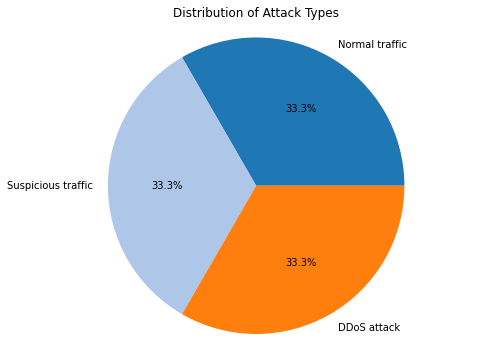

In [ ]:
# see how many records are in different classes
value_counts = vector_df['Type'].value_counts()
labels = sorted(value_counts.index)
print(value_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(value_counts.values, labels = value_counts.index,  autopct='%1.1f%%', colors = plt.cm.tab20.colors)
plt.axis('equal')
plt.title("Distribution of Attack Types")

plt.savefig('../imgs/all_vector_df_type_dist.jpg', bbox_inches='tight')

plt.show()


Type
Suspicious traffic    390308
DDoS attack           369879
Name: count, dtype: int64


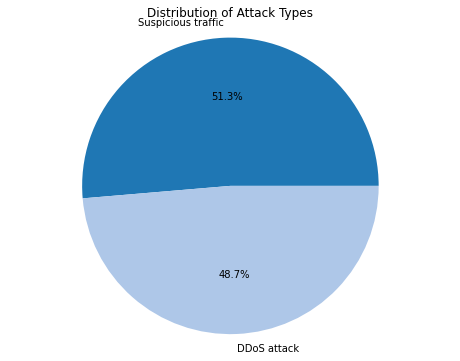

In [ ]:
# see how many records are in different classes in the synthetic data
value_counts = vector_df[vector_df['is_synthetic'] == True]['Type'].value_counts()
labels = sorted(value_counts.index)
print(value_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(value_counts.values, labels = value_counts.index,  autopct='%1.1f%%', colors = plt.cm.tab20.colors)
plt.axis('equal')
plt.title("Distribution of Attack Types")

plt.savefig('../imgs/aug_vector_df_type_dist.jpg', bbox_inches='tight')

plt.show()

In [ ]:
# import functions
from visualise import calculate_zscores, create_violin_plots

In [ ]:
vector_df['Type'].value_counts()

Type
Normal traffic        448943
Suspicious traffic    448943
DDoS attack           448943
Name: count, dtype: int64

In [ ]:
list(vector_df['Type'].unique())

['Normal traffic', 'Suspicious traffic', 'DDoS attack']

In [ ]:
labels

['DDoS attack', 'Suspicious traffic']

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


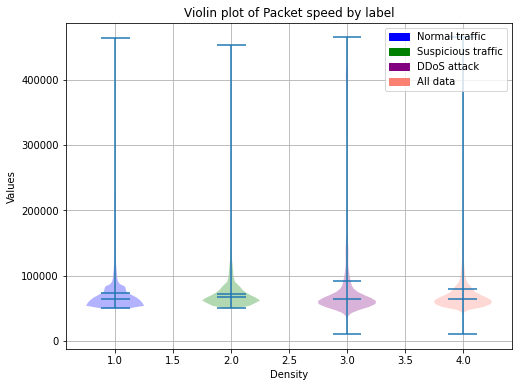

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


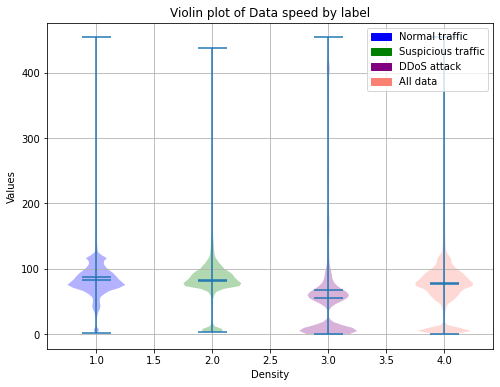

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


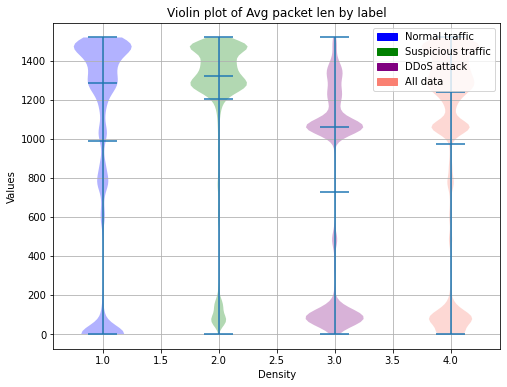

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


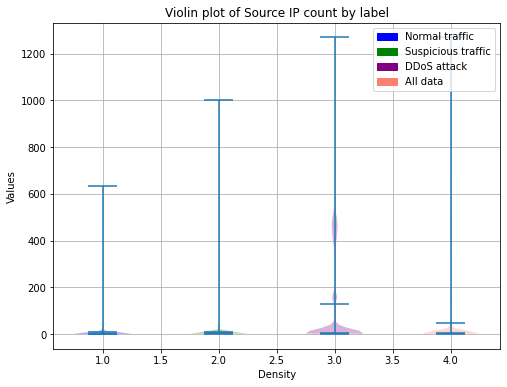

In [ ]:
columns_to_plot = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count']

for col in columns_to_plot:
  zscores = calculate_zscores(vector_df, col)
  create_violin_plots(vector_df, col, zscores, threshold = 3, labels= list(vector_df['Type'].unique()))

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


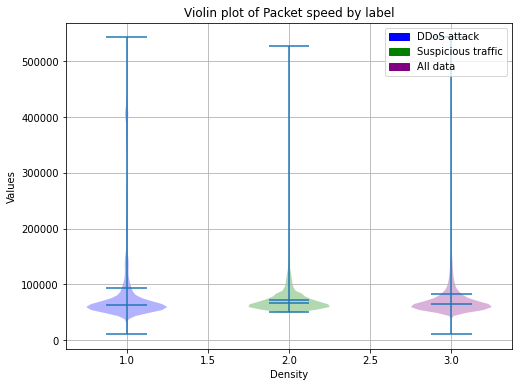

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


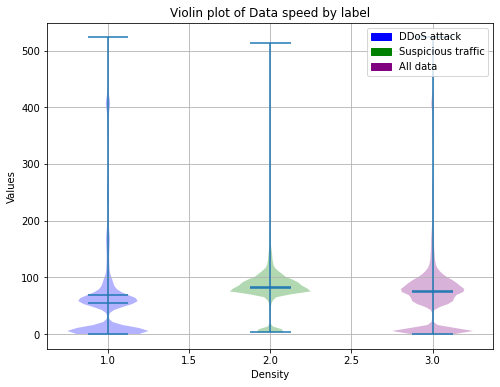

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


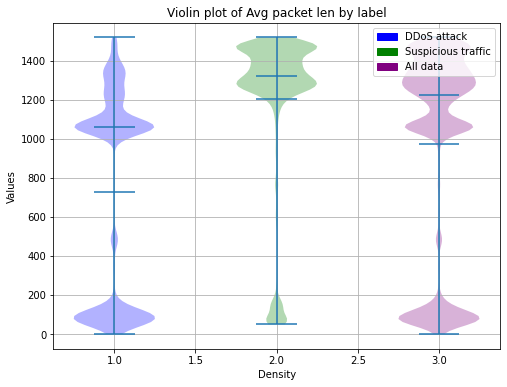

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


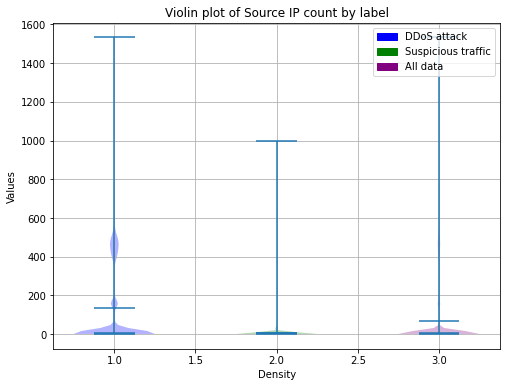

In [ ]:
columns_to_plot = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count']

for col in columns_to_plot:
  zscores = calculate_zscores(vector_df[vector_df['is_synthetic'] == True], col)
  create_violin_plots(vector_df[vector_df['is_synthetic'] == True], col, zscores, threshold = 3, labels=list(vector_df['Type'].unique()), synth = True)